# Australian Bushfire Dataset (NASA Satellite)
All exercises will work on the 
[Australia Fire dataset](https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland)
We will work with 
[fire_nrt_V1_96617.csv](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-firedata)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading  

In [8]:
data_path = r'fire_nrt_V1_96617.csv'

In [9]:
data = pd.read_csv(data_path)

In [10]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
latitude      956257 non-null float64
longitude     956257 non-null float64
bright_ti4    956257 non-null float64
scan          956257 non-null float64
track         956257 non-null float64
acq_date      956257 non-null object
acq_time      956257 non-null int64
satellite     956257 non-null object
instrument    956257 non-null object
confidence    956257 non-null object
version       956257 non-null object
bright_ti5    956257 non-null float64
frp           956257 non-null float64
daynight      956257 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [199]:
data.describe() # statistical measures

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000


## Task 1: Density Plots (50 points)
**1.1.** Plot the longitude vs latitude several ways within a single figure (each in its own axes):
1. Using the matplotlib defaults.
2. Adjusting alpha and marker size to compensate for overplotting.
3. Using a hexbin plot.
4. Subsampling the dataset.

For each but the first one, ensure that all the plotting area is used in a reasonable way and that
as much information as possible is conveyed; this is somewhat subjective and there is no one
right answer. [45 pts]

**1.2.** In what areas are most of the anomalies (measurements) located? [5pts]

#### 1.1 Visualization Plots

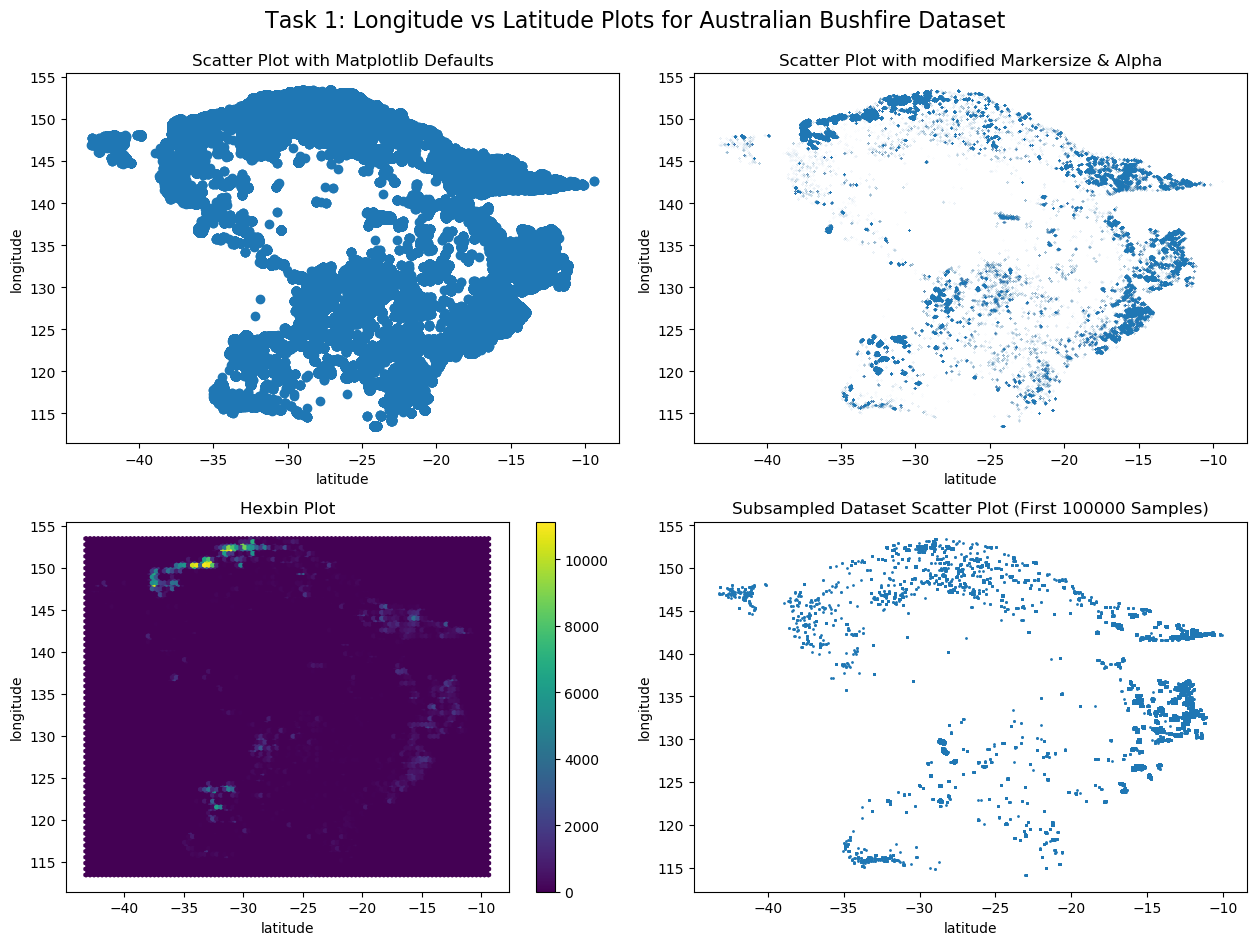

In [162]:
fig, ax = plt.subplots(2,2,figsize=(2*6.4,2*4.8)) # (6.4,4.8) is default fig size
fig.suptitle('Task 1: Longitude vs Latitude Plots for Australian Bushfire Dataset', fontsize = 16)
# using matplotlib defaults
ax[0,0].plot(data['latitude'], data['longitude'], 'o') # scatter plot
ax[0,0].set(xlabel='latitude', ylabel='longitude', title='Scatter Plot with Matplotlib Defaults')
# adjusting alpha and marker size to compensate for overplotting
ax[0,1].plot(data['latitude'], data['longitude'], 'o', markersize=0.1, alpha=0.15)
ax[0,1].set(xlabel='latitude', ylabel='longitude', title='Scatter Plot with modified Markersize & Alpha')
# hexbin plot (better visualization)
hb = ax[1,0].hexbin(data['latitude'], data['longitude'], )
ax[1,0].set(xlabel='latitude', ylabel='longitude', title='Hexbin Plot')
plt.colorbar(hb, ax=ax[1,0]) # fig.colorbar() would also work
# Subsampled dataset visualization
values_count = 100000
ax[1,1].plot(data['latitude'][:values_count], data['longitude'][:values_count], 'o',alpha=1.0, markersize=1.0)
ax[1,1].set(xlabel='latitude', ylabel='longitude', title='Subsampled Dataset Scatter Plot (First 100000 Samples)')
#plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95]) # hack to avoid overlap between fig title and axes titles

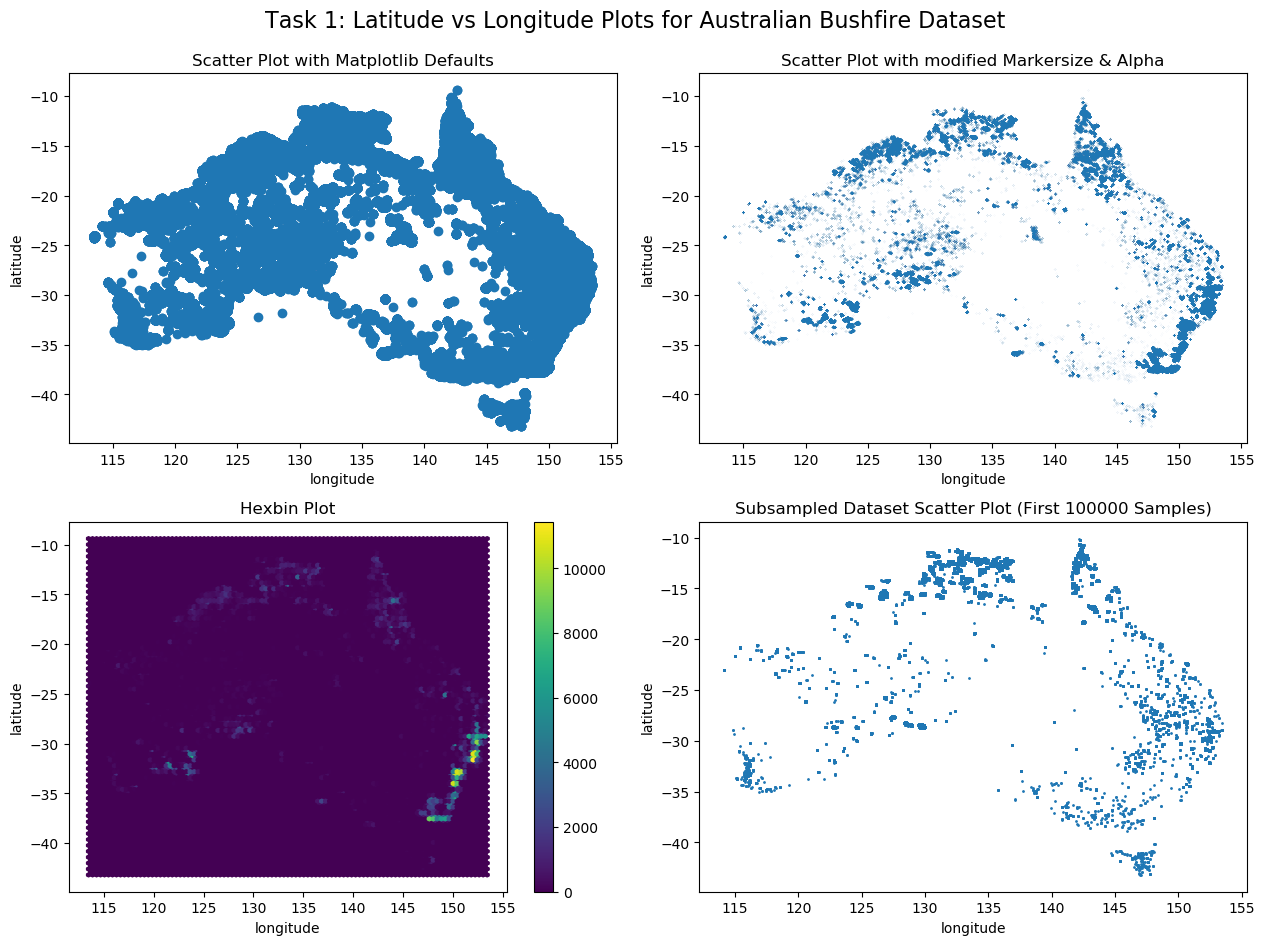

In [161]:
# latitude vs longitude plot is similar to the actual map of australia
fig, ax = plt.subplots(2,2,figsize=(2*6.4,2*4.8)) # (6.4,4.8) is default fig size
fig.suptitle('Task 1: Latitude vs Longitude Plots for Australian Bushfire Dataset', fontsize = 16)
# using matplotlib defaults
ax[0,0].plot(data['longitude'], data['latitude'], 'o') # scatter plot
ax[0,0].set(xlabel='longitude', ylabel='latitude', title='Scatter Plot with Matplotlib Defaults')
# adjusting alpha and marker size to compensate for overplotting
ax[0,1].plot(data['longitude'], data['latitude'], 'o', markersize=0.1, alpha=0.15)
ax[0,1].set(xlabel='longitude', ylabel='latitude', title='Scatter Plot with modified Markersize & Alpha')
# hexbin plot (better visualization)
hb = ax[1,0].hexbin(data['longitude'], data['latitude'], )
ax[1,0].set(xlabel='longitude', ylabel='latitude', title='Hexbin Plot')
plt.colorbar(hb, ax=ax[1,0]) # fig.colorbar() would also work
# Subsampled dataset visualization
values_count = 100000
ax[1,1].plot(data['longitude'][:values_count], data['latitude'][:values_count], 'o',alpha=1.0, markersize=1.0)
ax[1,1].set(xlabel='longitude', ylabel='latitude', title='Subsampled Dataset Scatter Plot (First 100000 Samples)')
#plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95]) # hack to avoid overlap between fig title and axes titles

#### 1.2 anomalies locaiton
- Most of the anomalies are along the boundaries of the country and especially on the east-western side

## Task 2: Visualizing class membership (50 points)
Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate
settings). Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as
visible from the histogram.

**2.1** Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs
long for those points with brightness saturated and a separate for those who are not (within the
same figure on separate axes). You can pick any of the methods from 1.1 that you find most
suitable. Can you spot differences in the distributions? [20 pts]

**2.2** Plot both groups in the same axes with different colors. Try changing the order of plotting
the two classes (i.e. draw the saturated first then the non-saturated or the other way around).
Make sure to include a legend. How does that impact the result? [20 pts]

### Histogram Plot (Finding the Saturation Value) 

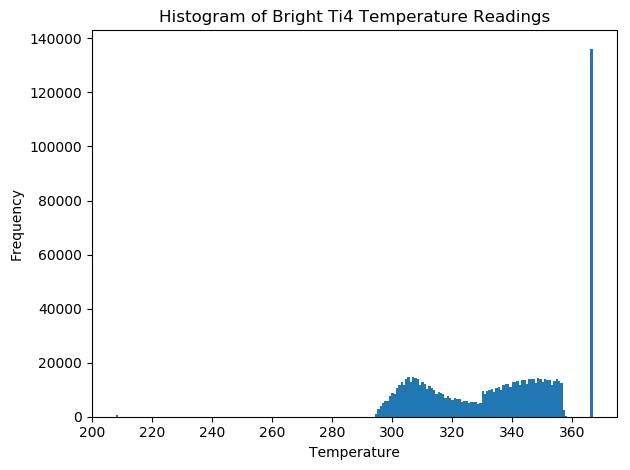

In [277]:
plt.hist(data['bright_ti4'], bins = 'auto');
plt.title('Histogram of Bright Ti4 Temperature Readings'), plt.xlabel('Temperature'), plt.ylabel('Frequency')
plt.tight_layout()

In [274]:
# if we explore dataset further, then we find all high confidence fires to have a bright_ti4 temp of 367.0 that
# is the maximum value picked up by the sensor so we can clearly use it as a saturation value 
data[data['confidence']=='h']['bright_ti4'].describe()

count    108407.0
mean        367.0
std           0.0
min         367.0
25%         367.0
50%         367.0
75%         367.0
max         367.0
Name: bright_ti4, dtype: float64

In [275]:
sat_value = data['bright_ti4'].max() # saturation value
print('Saturation Value: ', sat_value)

Saturation Value:  367.0


### 2.1: Saturated vs NonSaturated Locations Scatter Plot

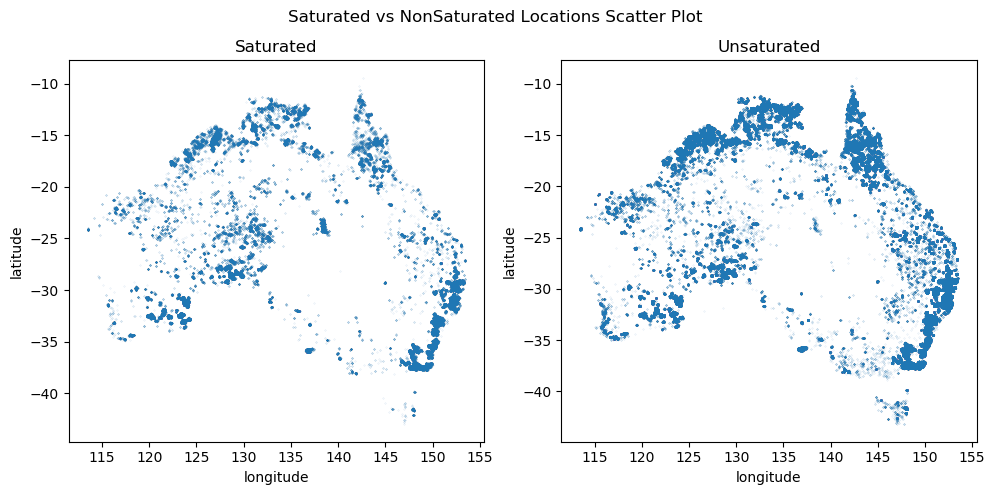

In [279]:
fig1, ax1 = plt.subplots(1,2, figsize=(10,5))
fig1.suptitle('Saturated vs NonSaturated Locations Scatter Plot')
sat_df = data[data['bright_ti4'] >= sat_value] # contains saturated dataframe
unsat_df = data[data['bright_ti4'] < sat_value]# contains unsaturated dataframe 
ax1[0].plot(sat_df['longitude'], sat_df['latitude'], 'o', alpha=0.25, markersize=0.2)
ax1[0].set(title='Saturated', xlabel='longitude', ylabel='latitude')
ax1[1].plot(unsat_df['longitude'], unsat_df['latitude'], 'o', alpha=0.25, markersize=0.2)
ax1[1].set(title='Unsaturated', xlabel='longitude', ylabel='latitude')
plt.tight_layout(rect=[0, 0, 1, 0.95]) # hack to avoid overlap between fig title and axes titles

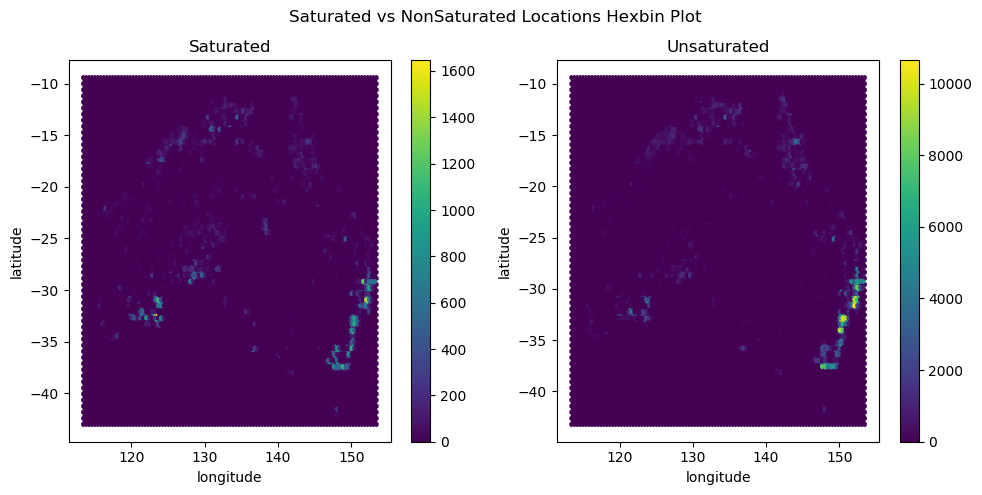

In [283]:
fig1, ax1 = plt.subplots(1,2, figsize=(10,5))
fig1.suptitle('Saturated vs NonSaturated Locations Hexbin Plot')
sat_df = data[data['bright_ti4'] >= sat_value] # contains saturated dataframe
unsat_df = data[data['bright_ti4'] < sat_value]# contains unsaturated dataframe 
hex0 = ax1[0].hexbin(sat_df['longitude'], sat_df['latitude'])
ax1[0].set(title='Saturated', xlabel='longitude', ylabel='latitude')
hex1 = ax1[1].hexbin(unsat_df['longitude'], unsat_df['latitude'])
ax1[1].set(title='Unsaturated', xlabel='longitude', ylabel='latitude')
plt.colorbar(hex0, ax=ax1[0])
plt.colorbar(hex1, ax=ax1[1])
plt.tight_layout(rect=[0, 0, 1, 0.95]) # hack to avoid overlap between fig title and axes titles

#### Comments
The important thing to observe is the colorbar scale that varies shows that saturated regions are much less dense as compared to unsaturated fire regions on the map. Moreover, the distribution are distributed similar to original distribution in Task 1.

### 2.2: Plotting one Distribution over Another 

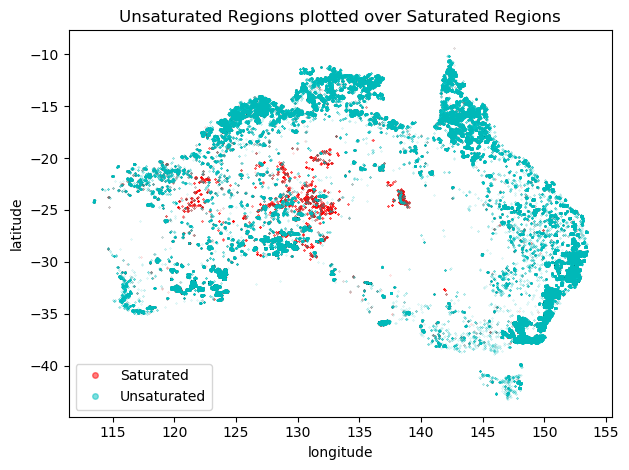

In [308]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(sat_df['longitude'], sat_df['latitude'], 'o', alpha=0.5, markersize=0.2, color='r', label='Saturated')
ax2.plot(unsat_df['longitude'], unsat_df['latitude'], 'o', alpha=0.5, markersize=0.2, color='c', label='Unsaturated')
ax2.set(xlabel='longitude', ylabel='latitude', title='Unsaturated Regions plotted over Saturated Regions')
ax2.legend(markerscale=20, loc="lower left")
plt.tight_layout()

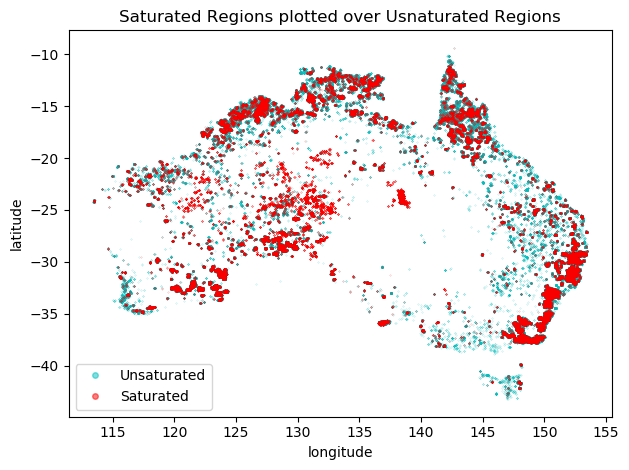

In [310]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(unsat_df['longitude'], unsat_df['latitude'], 'o', alpha=0.5, markersize=0.2, color='c', label='Unsaturated')
ax2.plot(sat_df['longitude'], sat_df['latitude'], 'o', alpha=0.5, markersize=0.2, color='r', label='Saturated')
ax2.set(xlabel='longitude', ylabel='latitude', title='Saturated Regions plotted over Usnaturated Regions')
ax2.legend(markerscale=20, loc="lower left")
plt.tight_layout()

#### Comments
Since Saturated Regions are much lesser so when plotted above unsaturated regions, 
they relatively convey better information as compared to unsaturated fire regions
plotted over saturated fire regions

### General Observations / KeyNotes

1. **plt.tight_layout() issue** plt.tight_layout() doesn't work well with plt.supplot() and it gets overlapped with axes titles. One solution is to use plt.constrained_layout() {but it is also not mature enough!}

[Hack](https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle/8248506#8248506): 
You may provide an optional rect parameter, which specifies the bounding box that the subplots will be fit inside. 
The coordinates must be in normalized figure coordinates and the default is (0, 0, 1, 1) [left, bottom, right, top].

2. To find default values of parameters, run 
```python
print(plt.rcParams)
```
& find them 
You may change a parameter by using 
```python
plt.rcParams['lines.markersize'] = 5.0
```
3. plt.scatter() use 's' for markersize. Another way is to use plt.rcParams and change its value manually. 
```python
#Below are 2 equivalent commands
ax2.plot(sat_df['longitude'], sat_df['latitude'], 'o', alpha=0.5, markersize=0.2, color='r', label='Saturated')
ax2.scatter(sat_df['longitude'], sat_df['latitude'], alpha=0.5, s=0.2, color='r', label='Saturated') 
```
4. plt.colormaps? gives info about available color maps in matplotlib

5. Legends can easily be picked up by the labels parameters passed to plt.plot()/scatter()